# STIX-Shifter CLI Quick Lab

## Overview

STIX (Structured Threat Information eXpression) is a JSON structure used to share cybersecurity threat intelligence. STIX-shifter is an open-source python library that is part of the Open Cybersecurity Alliance. It allows data repositories to be queried using STIX patterning and return the results as STIX cyber observable objects. This lab will allow users to test out the various stix-shifter CLI commands.

## STIX Patterning

A [STIX pattern](http://docs.oasis-open.org/cti/stix/v2.0/cs01/part5-stix-patterning/stix-v2.0-cs01-part5-stix-patterning.html) is used to query [cyber observable objects](https://docs.oasis-open.org/cti/stix/v2.0/stix-v2.0-part4-cyber-observable-objects.html). STIX patterns take the format of:

```
[<STIX OBJECT>:<PROPERTY> = 'some value' AND <STIX OBJECT>:<PROPERTY> IN (value_1, value_2)] 
OR [<STIX OBJECT>:<PROPERTY> = 'some value']
```

The `[ ]` represents one observation. A pattern can have multiple observations joined by the AND or OR observation operators. An observation can be thought of as one instance or row of data. Within the observation is one or more comparison expressions that looks for a value associated to a cyber observable STIX object and its property. This is a sample pattern with one observation containing an comparison operation for an IP lookup: 
```
[ipv4-addr:value = '1.2.3.4']
``` 
The STIX object in this case is `ipv4-addr` and the property on that object is `value`.

## STIX Observed Data

STIX-shifter returns a `bundle` of STIX `observed-data` objects. The bundle is a container object to hold the results. Below is a sample bundle containing one identity object (representing the data source) and one observed-data object containing 10 cyber observable objects (numbered from 0 to 9):

```json
{
    "type": "bundle",
    "id": "bundle--57d455df-105d-4722-8277-e569110e82ed",
    "objects": [
        {
            "type": "identity",
            "id": "identity--f431f809-377b-45e0-aa1c-6a4751cae5ff",
            "name": "QRadar",
            "identity_class": "system"
        },
        {
            "id": "observed-data--4db61897-4725-483b-9e68-2874e48650c5",
            "type": "observed-data",
            "created_by_ref": "identity--f431f809-377b-45e0-aa1c-6a4751cae5ff",
            "created": "2022-04-28T14:16:41.544Z",
            "modified": "2022-04-28T14:16:41.544Z",
            "objects": {
                "0": {
                    "type": "x-oca-event",
                    "action": "Logon Failure - Unknown user name or bad password",
                    "outcome": "Host Login Failed",
                    "category": [
                        "Authentication"
                    ],
                    "provider": "Microsoft Windows Security Event Log",
                    "agent": "WindowsAuthServer @ microsoft.windows.test.com",
                    "created": "2021-06-28T19:35:58.000Z",
                    "network_ref": "2",
                    "user_ref": "4",
                    "url_ref": "7",
                    "file_ref": "8"
                },
                "1": {
                    "type": "ipv4-addr",
                    "value": "109.0.216.203"
                },
                "2": {
                    "type": "network-traffic",
                    "src_ref": "1",
                    "src_port": 3000,
                    "dst_ref": "3",
                    "dst_port": 1000,
                    "protocols": [
                        "TCP"
                    ]
                },
                "3": {
                    "type": "ipv4-addr",
                    "value": "192.168.1.11"
                },
                "4": {
                    "type": "user-account",
                    "user_id": "bill_holland"
                },
                "5": {
                    "type": "ipv4-addr",
                    "value": "0.0.0.0"
                },
                "6": {
                    "type": "artifact",
                    "payload_bin": "PDEzPk1hciAyMSAwMTo0Mjo1MCBtaWNyb3NvZnQud2luZG93cy50ZXN0LmNvbQ==",
                    "mime_type": "text/plain"
                },
                "7": {
                    "type": "url",
                    "value": "www.example.com"
                },
                "8": {
                    "type": "file",
                    "name": "myfile.exe",
                    "hashes": {
                        "SHA-256": "86c5ceb27e1bf441130299c0209e5f35b88089f62c06b2b09d65772274f12057"
                    },
                    "parent_directory_ref": "9"
                },
                "9": {
                    "type": "directory",
                    "path": "C://filepath"
                }
            },
            "first_observed": "2021-06-28T19:35:58.652Z",
            "last_observed": "2021-06-28T19:36:58.652Z",
            "number_observed": 31
        }
    ],
    "spec_version": "2.0"
}
```

Each observed-data object contains a numbered set of cyber-observable objects. The properties on the cyber-observable object store the data returned from the data source. See the [STIX 2.0 standard](https://docs.oasis-open.org/cti/stix/v2.0/stix-v2.0-part4-cyber-observable-objects.html) for more on cyber observable objects.

## STIX-Shifter CLI commands

The CLI tools, and by extension the connector logic, is broken up into two types of functions: `translate` and `transmit`. 

The **translate** functions handle the following tasks:

1. Convert a STIX pattern into a native data source query. 
2. Convert JSON results returned from the data source into STIX objects. 

The **transmit** functions interface with the target data source APIs and handle the following tasks:

1. Make queries of the data source
2. Check the query status
3. Fetch the query results
4. Ping the data source to confirm a connection can be made
5. Delete an active query (if supported by the APIs)

There is also an **execute** command that runs through the entire query flow:

* Translate a STIX pattern into a native data source query
* Send the query to the data source via the data source APIs
* Check the status of the query via the data source APIs
* Fetch the query results via the APIs and, if needed, converts them to JSON
* Translate the JSON results into STIX objects

----------------------------------------------------------------------------------------------------------------------

## Setup

### Prerequisites

* Python 3
* pip
* venv
* Ability to run bash commands

### Run the following steps in a terminal

### 1. Create a working directory

Call the folder **connector_lab**


```bash
mkdir connector_lab
cd connector_lab
```

### 2. Clone the stix-shifter project


```bash
git clone https://github.com/opencybersecurityalliance/stix-shifter.git
```

### 3. Install and activate a Python virtual environment and upgrade pip

```bash
python3 -m venv labenv
source labenv/bin/activate
python3 -m pip install --upgrade pip
```

### 4. Install jupyter notebook and the ipython kernal to use the virtual environment

```bash
python3 -m pip install notebook
ipython kernel install --user --name=labenv
```

### 5. CD into the STIX-shifter lab directory

```bash
cd stix-shifter/lab
```

### 6. Run jupyter notebook

```bash
jupyter notebook
```

### All remaining steps take place in the jupyter notebook

### 7. Confirm the Jupyter Kernel is using the labenv virtual environment

If the kernel is something other than `labenv`, change it. This will ensure that every notebook cell runs in the virtual environment.

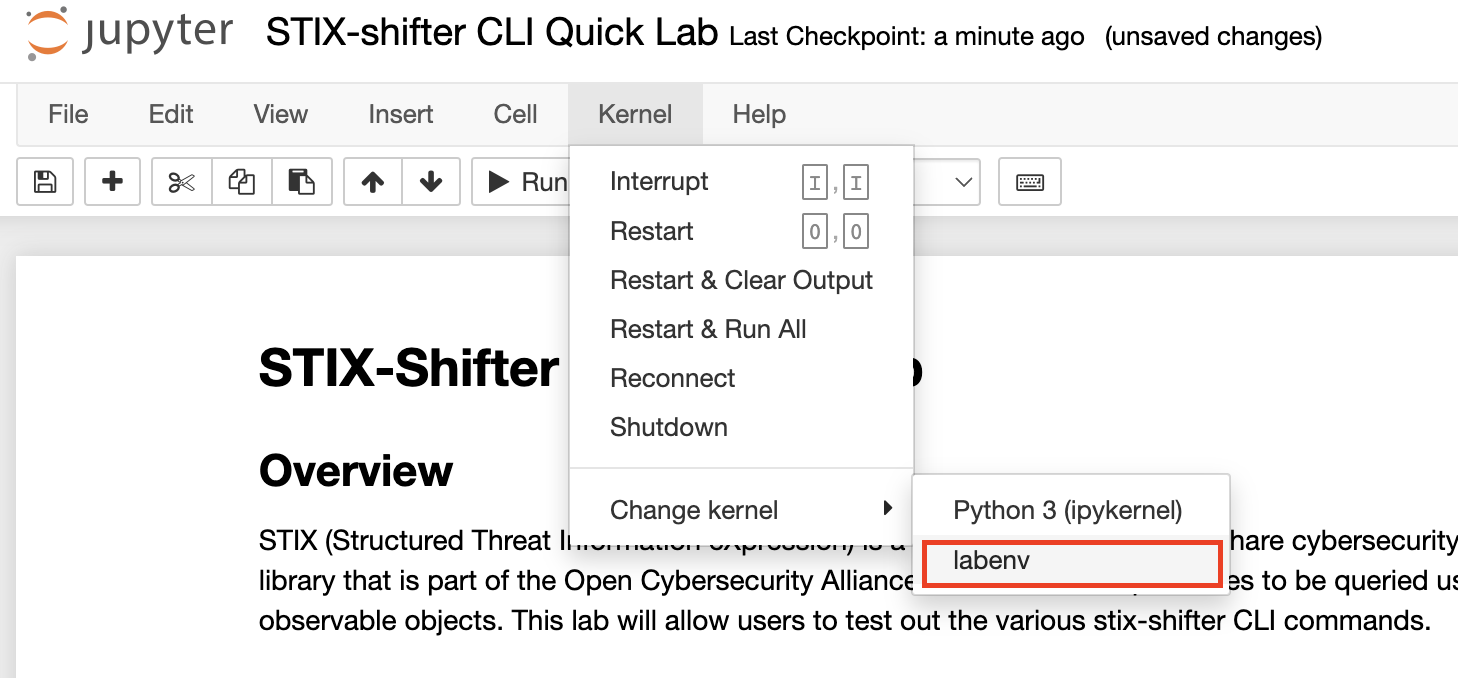

### 8. Install the shared STIX-shifter libraries used in this lab

This installs the core stix-shifter and utils library along with the STIX-bundle and QRadar connectors.

In [ ]:
%%bash
python3 -m pip install stix-shifter stix-shifter-utils

----------------------------------------------------------------------------------------------------------------------

# Lab Exercise 1: Using CLI tools with the STIX-Bundle connector

The STIX Bundle connector is different from other connectors in that it doesn't actually translate any STIX patterns or JSON results. It will simply pass the pattern on to the [stix2-matcher](https://pypi.org/project/stix2-matcher/) library which will then use it to query against a bundle of STIX data. Since this library returns a bundle of STIX data, stix-shifter does not need to translation the results back into STIX.

## Step 1: Examine the STIX Bundle
This is a bundle of STIX observed-data objects containing sanitized data from a CrowdStrike instance.

https://raw.githubusercontent.com/opencybersecurityalliance/stix-shifter/develop/data/cybox/crowdstrike/crowdstrike_detections_20210723.json

The `stix_bundle` connector will query the sample STIX bundle and return a subset of data based on the query pattern.

Note the bundle of observed-data objects that are returned. Each of these objects contains a numbered set of cyber observable objects (`url`, `network-traffic`, `ipv4-addr`…) which contain the data from the target data source.

## Step 2: Install the STIX Bundle connector library

In [ ]:
%%bash
python3 -m pip install stix-shifter-modules-stix_bundle

## Step 3: Set environment variables to be used in the CLI

### STIX Bundle URL
This points to a publicly aviablable, static JSON file of STIX data. 

In [ ]:
%env BUNDLE_URL https://raw.githubusercontent.com/opencybersecurityalliance/stix-shifter/develop/data/cybox/crowdstrike/crowdstrike_detections_20210723.json
    

### STIX Identity Object
The identity object represents the data source the STIX results are taken from. As we will see, the identity object is passed into some of the CLI commands so that STIX-shifter can prepend it to the top of the bundle of STIX results.

In [ ]:
%env IDENTITY_OBJECT \
{ \
 "type":"identity", \
 "id":"identity--f431f809-377b-45e0-aa1c-6a4751cae5ff", \
 "name":"STIX Bundle", \
 "identity_class":"system", \
 "created": "2022-04-07T20:35:41.042Z", \
 "modified": "2022-04-07T20:35:41.042Z" \
}   

### Authentication object
The CLI transmission commands require that connection and authention details are passed in so that the connector can talk to the target data source. In this case the `"auth"` object is empty since the STIX bundle we will query is publicly available and doesn't need any access credentials.

In [ ]:
%env BUNDLE_AUTH {"auth": {}}

## STIX-Shifter Transmission CLI commands
The transmission commands use the data source APIs to send a query, check the status, fetch the results, and ping the connection.

## Step 4: Run the ping command
The `ping` command checks that the data source can be reached by the stix-shifter connector.

In [ ]:
%%bash
stix-shifter transmit stix_bundle '{"url": "'"$BUNDLE_URL"'"}' "$BUNDLE_AUTH" ping


## Step 5: Run the query command
This command sends the native query to the data source.

In [ ]:
%%bash
stix-shifter transmit stix_bundle '{"url": "'"$BUNDLE_URL"'"}' "$BUNDLE_AUTH" query "[ipv4-addr:value = '192.168.0.8']"


## Step 6: Run the status command
This command checks the status of the query.

In [ ]:
%%bash
stix-shifter transmit stix_bundle '{"url": "'"$BUNDLE_URL"'"}' "$BUNDLE_AUTH" status "[ipv4-addr:value = '192.168.0.8']"


## Step 7: Run the results command
This command fetches the query results

In [ ]:
%%bash
stix-shifter transmit stix_bundle '{"url": "'"$BUNDLE_URL"'"}' "$BUNDLE_AUTH" results "[ipv4-addr:value = '192.168.6.242']" 0 2


## Step 8: Run the execute command
Notice how the identity object, bundle URL and authentication, and STIX pattern are passed in. The result is a subset of observed-data objects from the original STIX bundle matching the pattern.

In [ ]:
%%bash
stix-shifter execute stix_bundle stix_bundle "$IDENTITY_OBJECT" '{"url": "'"$BUNDLE_URL"'"}' \
"$BUNDLE_AUTH" "[ipv4-addr:value = '12.111.222.0']"

----------------------------------------------------------------------------------------------------------------------

# Lab Exercise 2: Using CLI tools with the MySQL connector

This connector relies on running a local or remote MySQL database. The transmission calls interface with the datasource using the source APIs, in this case [mysql.connector](https://github.com/opencybersecurityalliance/stix-shifter/blob/develop/stix_shifter_modules/mysql/stix_transmission/api_client.py#L1). This is different from the STIX bundle connector that searches against a static JSON of data.

## Step 1: Install the required MySQL connector libraries

In [ ]:
%%bash
pip install \
stix-shifter-modules-mysql \
mysql-connector-python

## Step 2: Set the environment variables to be used in the CLI

### Connection details

In [ ]:
sql_database = "demo_db"
sql_password = "Giv3@m@n@fish"
sql_host = "localhost"
table = "demo_table"
sql_user = "root"
%env MYSQL_CONNECTION_OBJECT {"host":"localhost", "database":"demo_db", "options":{"table":"demo_table"}}
%env MYSQL_AUTH_OBJECT {"auth": {"username": "root", "password": "Giv3@m@n@fish"}}
%env MYSQL_TABLE_OPTIONS {"table":"demo_table"}

### STIX Identity Object
The identity object represents the data source the STIX results are taken from.

In [ ]:
%env MYSQL_IDENTITY_OBJECT \
{ \
 "type":"identity", \
 "id":"identity--20a77a37-911e-468f-a165-28da7d02985b", \
 "name":"MySQL Database", \
 "identity_class":"system", \
 "created": "2022-04-07T20:35:41.042Z", \
 "modified": "2022-04-07T20:35:41.042Z" \
}

## Step 3: Create the demo database

In [ ]:
import mysql.connector 

cnx = mysql.connector.connect(user=sql_user, password=sql_password, 
                                       host=sql_host, port=3306, auth_plugin='mysql_native_password')
cursor = cnx.cursor()

sql = "DROP DATABASE IF EXISTS {}".format(sql_database)
cursor.execute(sql)

sql = "CREATE DATABASE {}".format(sql_database)
cursor.execute(sql)

cnx.close()

## Step 4: Create and populate demo table

In [ ]:
import mysql.connector
import json
import csv

data_file = open("data.csv")

cnx = mysql.connector.connect(user=sql_user, password=sql_password, 
                                       host=sql_host, database=sql_database, 
                                       port=3306, auth_plugin='mysql_native_password')

cursor = cnx.cursor()

csv_reader = csv.reader(data_file, delimiter=',')
csv_rows = []
fields_list = []
data_types_list = []

sql = "DROP TABLE IF EXISTS {}".format(table)
cursor.execute(sql)

# Create table

for row in csv_reader:
    csv_rows.append(row)
fields_list = csv_rows[0]
data_types_list = csv_rows[1]

fields_and_type = "("
for index, field in enumerate(fields_list):
    fields_and_type += "{} {}, ".format(field, data_types_list[index])
fields_and_type = fields_and_type[:-2]
fields_and_type += ")"
print("Creating table with the following fields: {}".format(fields_list))
sql = "CREATE TABLE {} {};".format(table, fields_and_type)
cursor.execute(sql)

# Populate table from CSV file

print("Populating table with data")
sql_insert_parameters = ("%s," * len(fields_list))[:-1]
for index, row in enumerate(csv_rows):
    if index < 2:
        continue
    sql = "INSERT INTO {} ({}) VALUES ({})".format(table, ", ".join(fields_list), sql_insert_parameters)
    value_tuple = tuple(row)
    cursor.execute(sql, value_tuple)
    cnx.commit()
    
cnx.close()
    


## Step 5: Examine the demo table contents

This will be the data the MySQL connector will query against.

In [ ]:
import mysql.connector
import json


cnx = mysql.connector.connect(user=sql_user, password=sql_password, 
                                       host=sql_host, database=sql_database, 
                                       port=3306, auth_plugin='mysql_native_password')

cursor = cnx.cursor()

column_query = "SHOW COLUMNS FROM %s" % table
cursor.execute(column_query)
column_collection = cursor.fetchall()
column_list = []

for tuple in column_collection:
    column_list.append(tuple[0])


sql = "SELECT * FROM {}".format(table)
cursor.execute(sql)

result_collection = cursor.fetchall()

results_list = []

# Max number of rows to return in results
row_count = 100

# Put table data in JSON format
for index, tuple in enumerate(result_collection):
    if index < 0:
        continue
    if row_count < 1:
        break
    results_object = {}
    for index, datum in enumerate(tuple):
        results_object[column_list[index]] = datum
    results_list.append(results_object)
    row_count -= 1

print(json.dumps(results_list, indent=2))
    
cnx.close()
    

## Step 6: Transmit the ping command
The `ping` command will check that the connector can talk to the MySQL instance.

In [ ]:
%%bash
stix-shifter transmit mysql "$MYSQL_CONNECTION_OBJECT" "$MYSQL_AUTH_OBJECT" ping


## Step 7: Translate a STIX pattern into a native SQL query

Translation from a STIX pattern to a native query is controlled by a `from_stix.json` mapping file. A snippet of the [MySQL from-STIX mapping file](https://github.com/opencybersecurityalliance/stix-shifter/blob/develop/stix_shifter_modules/mysql/stix_translation/json/from_stix_map.json) shows:

```json
  "url": {
    "fields": {
      "value": ["url"]
    }
  },
  "file": {
    "fields": {
       "name": ["filename"],
       "hashes.'SHA-256'": ["sha256hash"],
       "hashes.MD5": ["md5hash"],
       "parent_directory_ref.path": ["file_path"],
       "created": ["file_created_time"],
       "modified": ["file_modified_time"],
       "accessed": ["file_accessed_time"]
    }
  }
```
The outer key is the STIX object and the `fields` attribute contains a dictionary of STIX properties for that object. Each property is associated to a list of native data source fields. Using the following STIX pattern as an example:

`[file:name = 'myfile.exe']`

The connector would translate this into SQL query against the `filename` column in the table.

The CLI input format for pattern translation is `translate <connector type> query <identity object> <STIX pattern> <options>`. The MySQL connector requires that the table name be passed in the options. The translate query command returns a list of native query strings; in this case a list of SQL statements.

Below you will see that several STIX patterns are stored in an environment variable. Try running each one at a time followed by the translate query command and see how each pattern is translated into a SQL query.

### STIX Pattern 1: Searching for a URL

In [ ]:
%env STIX_PATTERN=[url:value = 'www.example.org']

In [ ]:
%%bash
stix-shifter translate mysql query "$MYSQL_IDENTITY_OBJECT" "$STIX_PATTERN" "$MYSQL_TABLE_OPTIONS"

### STIX Pattern 2: Searching for an IP address with a time range

In [ ]:
%env STIX_PATTERN=[ipv4-addr:value = '10.0.0.9'] START t'2019-01-28T12:24:01.009Z' STOP t'2019-01-28T12:54:01.009Z'

In [ ]:
%%bash
stix-shifter translate mysql query "$MYSQL_IDENTITY_OBJECT" "$STIX_PATTERN" "$MYSQL_TABLE_OPTIONS"

Note how `ipv4-addr:value` is translated into 

```
WHERE (source_ipaddr = '10.0.0.9' OR dest_ipaddr = '10.0.0.9')
```
This is because both `source_ipaddr` and `dest_ipaddr` are [mapped](https://github.com/opencybersecurityalliance/stix-shifter/blob/develop/stix_shifter_modules/mysql/stix_translation/json/from_stix_map.json#L2) to the `value` property for the `ipv4-addr` STIX object:

```json
"ipv4-addr": {
    "fields": {
      "value": ["source_ipaddr", "dest_ipaddr"]
    }
}
```
Also notice the **START STOP** qualifiers at the end of the STIX pattern `START t'2019-01-28T12:24:01.009Z' STOP t'2019-01-28T12:54:01.009Z'`. These act as a time range filter and get translated to `AND (entry_time >= 1548678241009 AND entry_time <= 1548680041009)` on the SQL query.

### STIX Pattern 3: Searching for an MD5 file hash

In [ ]:
%env STIX_PATTERN=[file:hashes.MD5 = 'edbe588a5881726e9bc41332ee330c72']

In [ ]:
%%bash
stix-shifter translate mysql query "$MYSQL_IDENTITY_OBJECT" "$STIX_PATTERN" "$MYSQL_TABLE_OPTIONS"

### STIX Pattern 4: Searching for only an unmapped property
The below example submits a STIX pattern that contains properties not mapped to any fields in the demo_table schema.

In [ ]:
%env STIX_PATTERN=[url:fake_property = 'I do not exist']

In [ ]:
%%bash
stix-shifter translate mysql query "$MYSQL_IDENTITY_OBJECT" "$STIX_PATTERN" "$MYSQL_TABLE_OPTIONS"

Note the `Unable to map` error that is returned. Examine the [from_stix_map.json](https://github.com/opencybersecurityalliance/stix-shifter/blob/develop/stix_shifter_modules/mysql/stix_translation/json/from_stix_map.json) file and you will see that the `url:fake_property` STIX object is not mapped to any SQL fields. A pattern that only contains unmapped properties will return this error. 

### STIX Pattern 5: Searching for both an unmapped and mapped property
STIX-shifter will strip out unmapped properties from the pattern and attempt to create a native query if logically possible. See the example below:

In [ ]:
%env STIX_PATTERN=[url:fake_property = 'I do not exist' OR ipv4-addr:value = '10.0.0.9']

In [ ]:
%%bash
stix-shifter translate mysql query "$MYSQL_IDENTITY_OBJECT" "$STIX_PATTERN" "$MYSQL_TABLE_OPTIONS"

The translated query has stripped out the unmapped property and still searches for the ip address because an `OR` operator is being used in the pattern, so a native query can still be logically created. If an `AND` operator was used instead, we would have gotten an `Unable to map` error like the example above..

Examine the [from_stix_map.json](https://github.com/opencybersecurityalliance/stix-shifter/blob/develop/stix_shifter_modules/mysql/stix_translation/json/from_stix_map.json) file and experiement translating other patterns.

## Step 8: Transmit the query command
The `query` command sends the native query to the data source.

In [ ]:
%%bash
stix-shifter transmit mysql "$MYSQL_CONNECTION_OBJECT" "$MYSQL_AUTH_OBJECT" query "SELECT * FROM demo_table WHERE url = 'www.example.org' limit 10000"


Note how the search_id that is returned is just the query string that was submitted. This is because the MySQL connector is synchronous. If this was an asynchronous connector, a search ID from the query API would have been returned instead.

## Step 9: Transmit the status command

The `status` command passes in the search ID, in this case the query string, and returns the status of the search.

In [ ]:
%%bash
stix-shifter transmit mysql "$MYSQL_CONNECTION_OBJECT" "$MYSQL_AUTH_OBJECT" status "SELECT * FROM demo_table WHERE url = 'www.example.org' limit 10000"


## Step 10: Transmit the results command

The `results` command returns the raw query results in JSON format. In addition to the query ID (for MySQL this would be the query string) an offset and length is passed into the CLI command. The example below passes in 1 and 2, this would mean that the results start at the first row, returning two rows in total.

In [ ]:
%%bash
stix-shifter transmit mysql "$MYSQL_CONNECTION_OBJECT" "$MYSQL_AUTH_OBJECT" results "SELECT * FROM demo_table WHERE url = 'www.example.org' limit 10000" 1 2


Notice that a list of JSON objects are returned. This is required by STIX-shifter before it can translate the results into STIX. If the data source API does not return JSON results, the results transmission logic will need to conver the results into JSON.

## Step 11: Translate the query results into STIX

Similar to translating STIX patterns to native queries, translating JSON results to STIX is largely driven by the connector's `to_stix_map.json` file. A snippet of the [MySQL to-STIX mapping file](https://github.com/opencybersecurityalliance/stix-shifter/blob/develop/stix_shifter_modules/mysql/stix_translation/json/to_stix_map.json) is shown below:

```json
{
  "username": [
    {
      "key": "user-account.user_id",
      "object": "useraccount"
    }
  ],
  "displayname": [
    {
      "key": "user-account.display_name",
      "object": "useraccount"
    }
  ],
  "filename": [
    {
      "key": "file.name",
      "object": "fl"
    },
    {
      "key": "process.binary_ref",
      "object": "process",
      "references": "fl"
    }
  ]
}
```
The mapping is the reverse of what we saw with the from-STIX map. The outer keys are the field names returned in the query results and the values contain a list of properties: 
1. The `"key"` property contains the STIX object and property that the data source field maps to. In the example above, data from the `username` field would be written to the STIX `user-account:user_id` property.
2. The `"object"` property allows multiple properties to be grouped under the same STIX object. In the example above, data from the `username` and `displayname` fields would be written to the same `useraccount` STIX object under the `user_id` and `display_name` properties respecitvely. 
3. The `filename` field is mapping to multiple STIX objects. The data in the file name is written to the STIX `file:name` property. When a `filename` is encountered in the results, it also creates a reference between to the STIX `file` object (note the `"object": "fl"`) from an existing process object under `process:binary_ref`.

### Load the sample results we wish to translate

In [ ]:
%env MYSQL_RESULTS \
[ \
   { \
      "source_ipaddr": "10.0.0.9", \
      "dest_ipaddr": "10.0.0.9", \
      "url": "www.example.org", \
      "filename": "spreadsheet.doc", \
      "sha256hash": "b0795d1f264efa26bf464612a95bba710c10d3de594d888b6282c48f15690459", \
      "md5hash": "0a556fbb7d3c184fad0a625afccd2b62", \
      "file_path": "C:/PHOTOS", \
      "username": "root",\
      "source_port": 143, \
      "dest_port": 8080, \
      "protocol": "udp", \
      "entry_time": 1617123877.0, \
      "system_name": "demo_system", \
      "severity": 2, \
      "magnitude": 1 \
   } \
]

### Translate the results into STIX

In [ ]:
%%bash
stix-shifter translate mysql results "$MYSQL_IDENTITY_OBJECT" "$MYSQL_RESULTS" "$MYSQL_TABLE_OPTIONS"


Since only one row was in the sample results, only one observed data object is returned in the bundle. As mentioned before, the identity object is inserted at the top of the bundle and represents the data source the results are coming from; note how the observed-data object has a `created_by_ref` property that references the identity object by its ID.

The observed-data object has an `objects` property that contains a numbered dictionary of cyber observable (cybox) objects. The properties of these cybox objects hold the data returned from the query based on the to-STIX mapping. The sample data had the value `spreadsheet.doc` stored in the `filename` field. You can see how that was written to the `name` property of the `file` STIX object.

The translated STIX shows how referencing works. The `network-traffic` object has a `src_ref` and `dst_ref` property, each pointing to the numbered key for a `ipv4-addr` object in the same `observed-data` object.

Experiment with editing the field names and data in the below sample data and try translating it again to see the results. If you rename a field, like changing `filename` to `RENAMED_filename`, you will see that it's data no longer appears in the STIX results. This is because the new field name is not represented in the [to_stix_map.json](https://github.com/opencybersecurityalliance/stix-shifter/blob/develop/stix_shifter_modules/mysql/stix_translation/json/to_stix_map.json) mapping.

In [ ]:
%env MYSQL_RESULTS \
[ \
   { \
      "source_ipaddr": "10.0.0.9", \
      "dest_ipaddr": "10.0.0.9", \
      "url": "www.example.org", \
      "sha256hash": "b0795d1f264efa26bf464612a95bba710c10d3de594d888b6282c48f15690459", \
      "md5hash": "0a556fbb7d3c184fad0a625afccd2b62", \
      "file_path": "C:/PHOTOS", \
      "username": "root", \
      "RENAMED_filename": "blah.jpg", \
      "source_port": 143, \
      "dest_port": 8080, \
      "protocol": "udp", \
      "entry_time": 1617123877.0, \
      "system_name": "demo_system", \
      "severity": 2, \
      "magnitude": 1 \
   } \
]

In [ ]:
%%bash
stix-shifter translate mysql results "$MYSQL_IDENTITY_OBJECT" "$MYSQL_RESULTS" "$MYSQL_TABLE_OPTIONS"


## Step 12: Run the execute command against the MySQL connector

We did this before for the bundle connector. The execute command will run through each of the translation and transmission steps covered above and return a bundle of STIX results. The STIX results are based on the pattern that is passed in. The format for calling the execute command is:
```
stix-shifter execute <CONNECTOR NAME> <CONNECTOR NAME> <IDENTITY OBJECT> <CONNECTION OBJECT> 
<AUTH OBJECT> <STIX PATTERN> <OPTIONS>
```
The connector name is repeated twice to allow for the possiblity of using different modules for translation and transmission.

In [ ]:
%env STIX_PATTERN=[url:value = 'www.example.org']

In [ ]:
%%bash
stix-shifter execute mysql mysql "$MYSQL_IDENTITY_OBJECT" "$MYSQL_CONNECTION_OBJECT" "$MYSQL_AUTH_OBJECT" "$STIX_PATTERN"
